# Individual Assignment
Student's details: <br/>
•Name: WANG Qilong <br/>
•Student ID: 20452454

Thanksgiving Day usually witnesses joys and reunions of Americans. But this year, they need to face fear, dilemma and cannot breathe freely on their way home.

The number of the Covid-19 cases in America had surged to 12,247,487 while the number of the deaths had risen to 256,783, as the U.S. Centers for Disease Control and Prevention (CDC) reported on November 23 when was several days before this national holiday began.

The sensational numbers about the Covid-19 pandemic in America keep growing as Americans don’t stop traveling nationally. But it’s hard for the foreigners to understand how serious the pandemic is in this country. By using visual elements, the data could leads the audience to know more deeply about the sufferings of Americans in this unstable year.

With the help of the Google Dataset Search recommended by HKBU Library in the Data Repositories, it’s easy to find the dataset United States COVID-19 Cases and Deaths by State over Time provided by CDC, which contains the detailed data of different states about the Covid-19 cases and deaths since January 22 this year, as well as the daily numbers of new cases the past 10 months.

(Dataset One: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36 )

By using this dataset and performing data analysis, it could be easy to discover the questions below:
1.	Which states of the US are hit most seriously by the Covid-19 pandemic?
2.	Which areas have the largest numbers of the deaths? 
3.	Is there a correlation between the numbers of the cases and the deaths?

It’s easy to do the data cleaning of the dataset mentioned above, because the data types are text and number. But it’s time-consuming. For example, it’s needed to change the ANSI alphabetic state code to the name of the state, , like “CO” to “Colorado”. Meanwhile, it’s needed to delete the data related with the Territory and Commonwealth areas recorded by CDC, like Guam (GU) and Palau (PW), which are not meaningful in this study. 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [3]:
print(type(df))
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death
0,01/22/2020,Colorado,0,NaN,NaN,0,NaN,0,0,NaN
1,01/23/2020,Colorado,0,NaN,NaN,0,NaN,0,0,NaN
2,01/24/2020,Colorado,0,NaN,NaN,0,NaN,0,0,NaN
3,01/25/2020,Colorado,0,NaN,NaN,0,NaN,0,0,NaN
4,01/26/2020,Colorado,0,NaN,NaN,0,NaN,0,0,NaN


In [4]:
df.tail(5)

,date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death
15941,11/19/2020,Vermont,3310,NaN,NaN,149,0.0,61,1,0.0
15942,11/20/2020,Vermont,3458,NaN,NaN,148,0.0,62,1,0.0
15943,11/21/2020,Vermont,3546,NaN,NaN,88,0.0,63,1,0.0
15944,11/22/2020,Vermont,3629,NaN,NaN,83,0.0,63,0,0.0
15945,11/23/2020,Vermont,3714,NaN,NaN,85,0.0,63,0,0.0


The dataset after the data cleaning contains ten columns included “date”, “state”, “tot_cases”, “conf_cases”, “prob_cases”, “new_case”, “pnew_case”, “tot_death”, “new_death” and “pnew_death”, as well as 15,946 rows. 

Actually, the “state” here includes fifty states, Washington D.C. and New York City which is separated from the New York State in this dataset for the perspectives of its seriousness as analyzed below in this research.

In [5]:
df.shape

(15946, 10)

In [6]:
df.columns

Index(['date', 'state', 'tot_cases', 'conf_cases', 'prob_cases', 'new_case',
       'pnew_case', 'tot_death', 'new_death', 'pnew_death'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=15946, step=1)

### Which states of the US are hit most seriously by the Covid-19 pandemic?
With the use of the bar chart and box plot, it's easy to figure out which states suffered the most in the pandemic.
The results show that: California, Texas, Florida, Illinois and Georgia. 

If combining the numbers of the total cases of New York and New York City together, it’s obvious that the New York area is another epicentre. 

<BarContainer object of 52 artists>

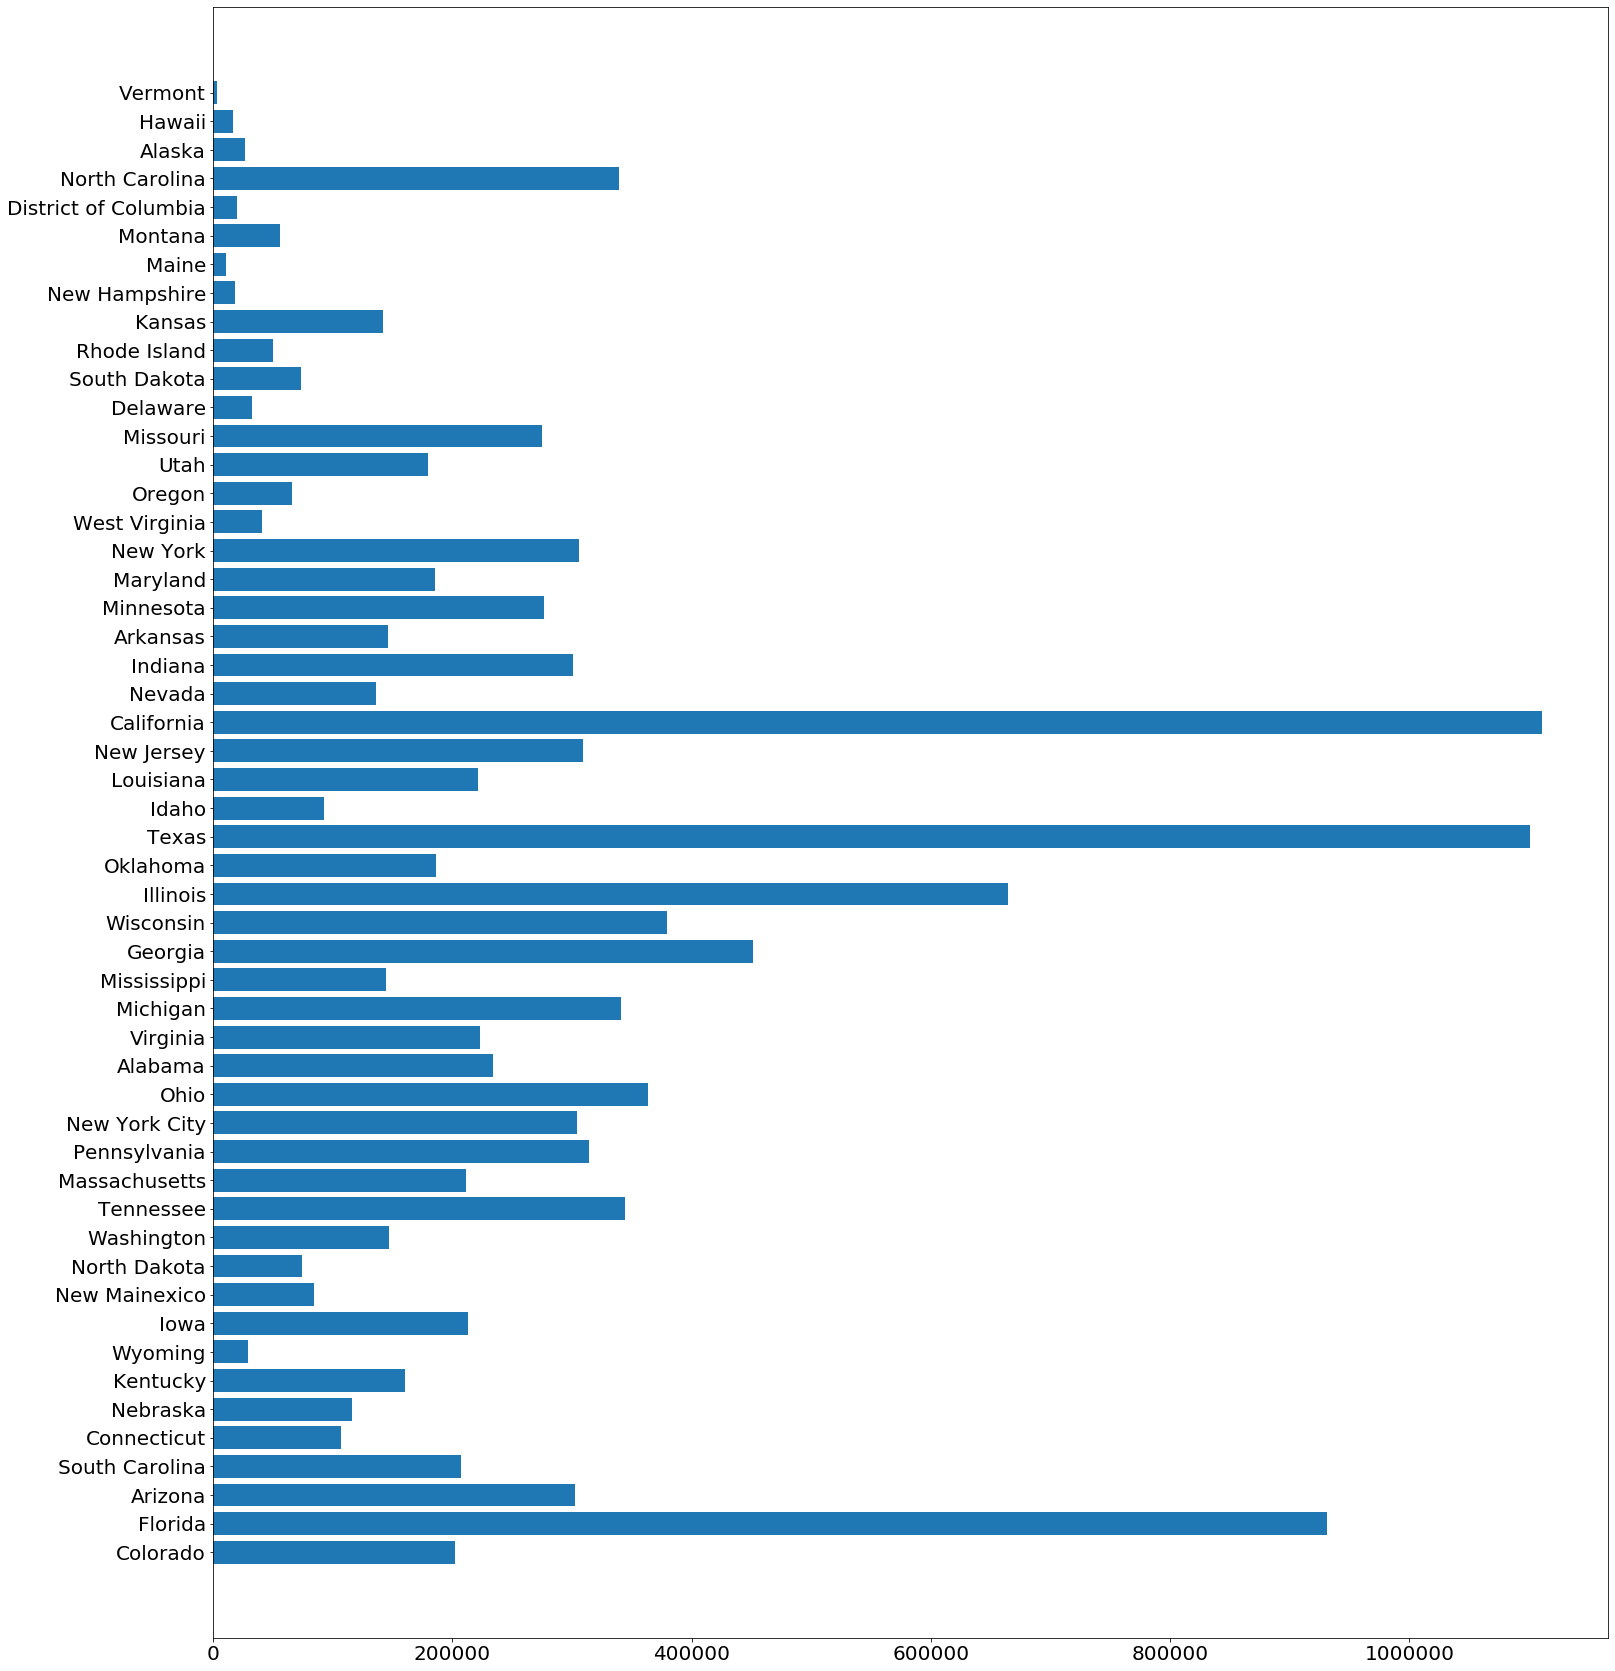

In [8]:
dfdate1123 = df[df['date'] == '11/23/2020']
fig = plt.figure(figsize=(25,30))  
#plt.tick_params(axis='x',labelsize=10) 
fontsize = 20
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.barh(dfdate1123['state'], dfdate1123['tot_cases'])

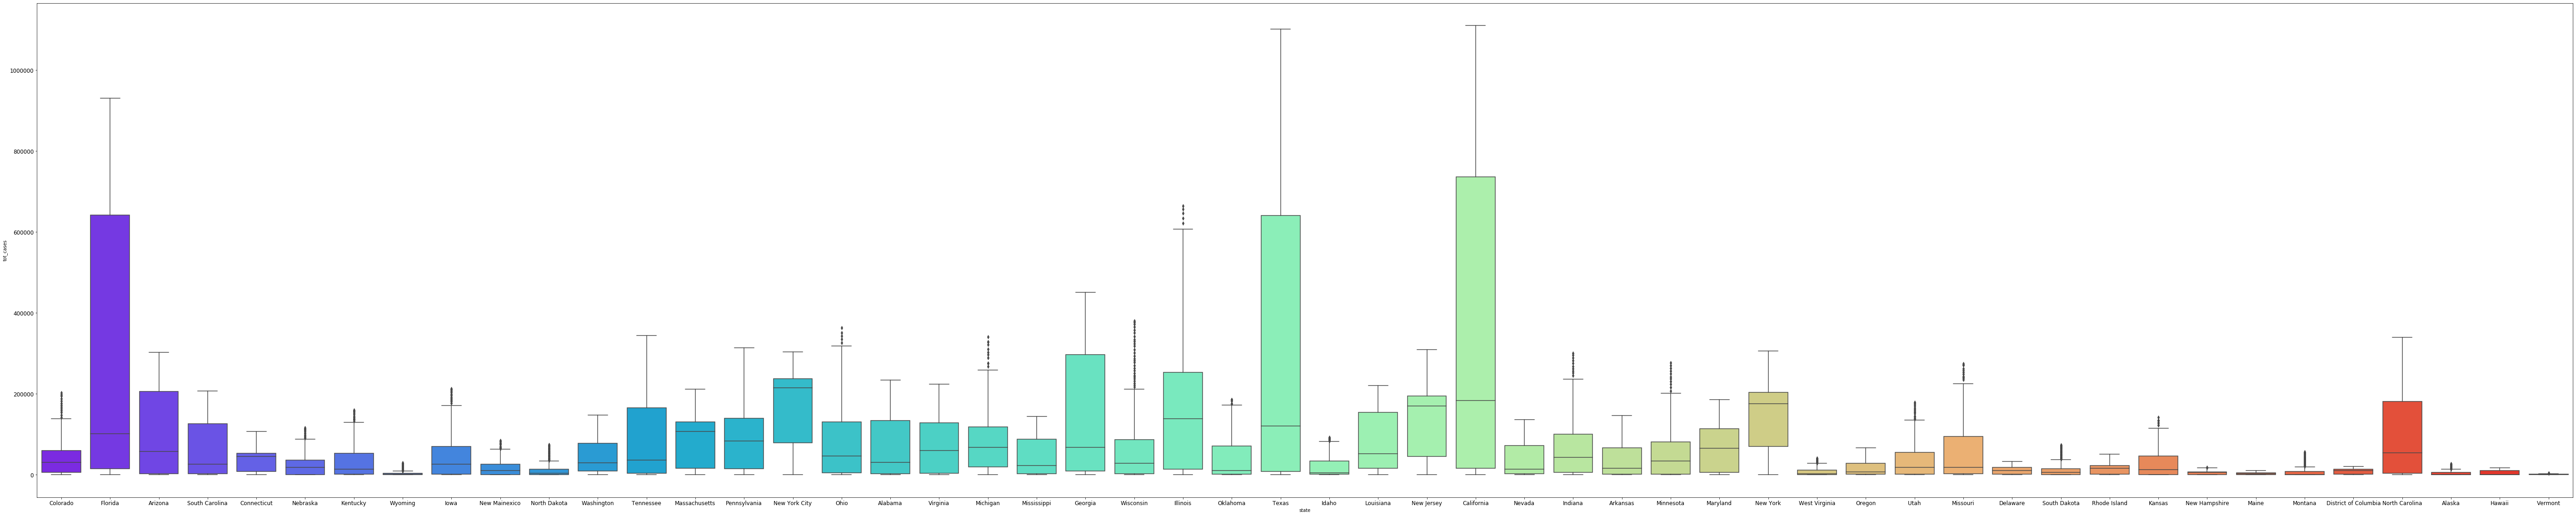

In [9]:
fig = plt.figure(figsize=(100,20))  
#plt.tick_params(axis='x',labelsize=10) 
fontsize = 12
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
sns.boxplot(x="state", y="tot_cases", data=df, palette='rainbow');

### Which areas have the largest numbers of the deaths?
With the use of the bar chart, we could find that New York City lost the most people in this pandemic.

<BarContainer object of 52 artists>

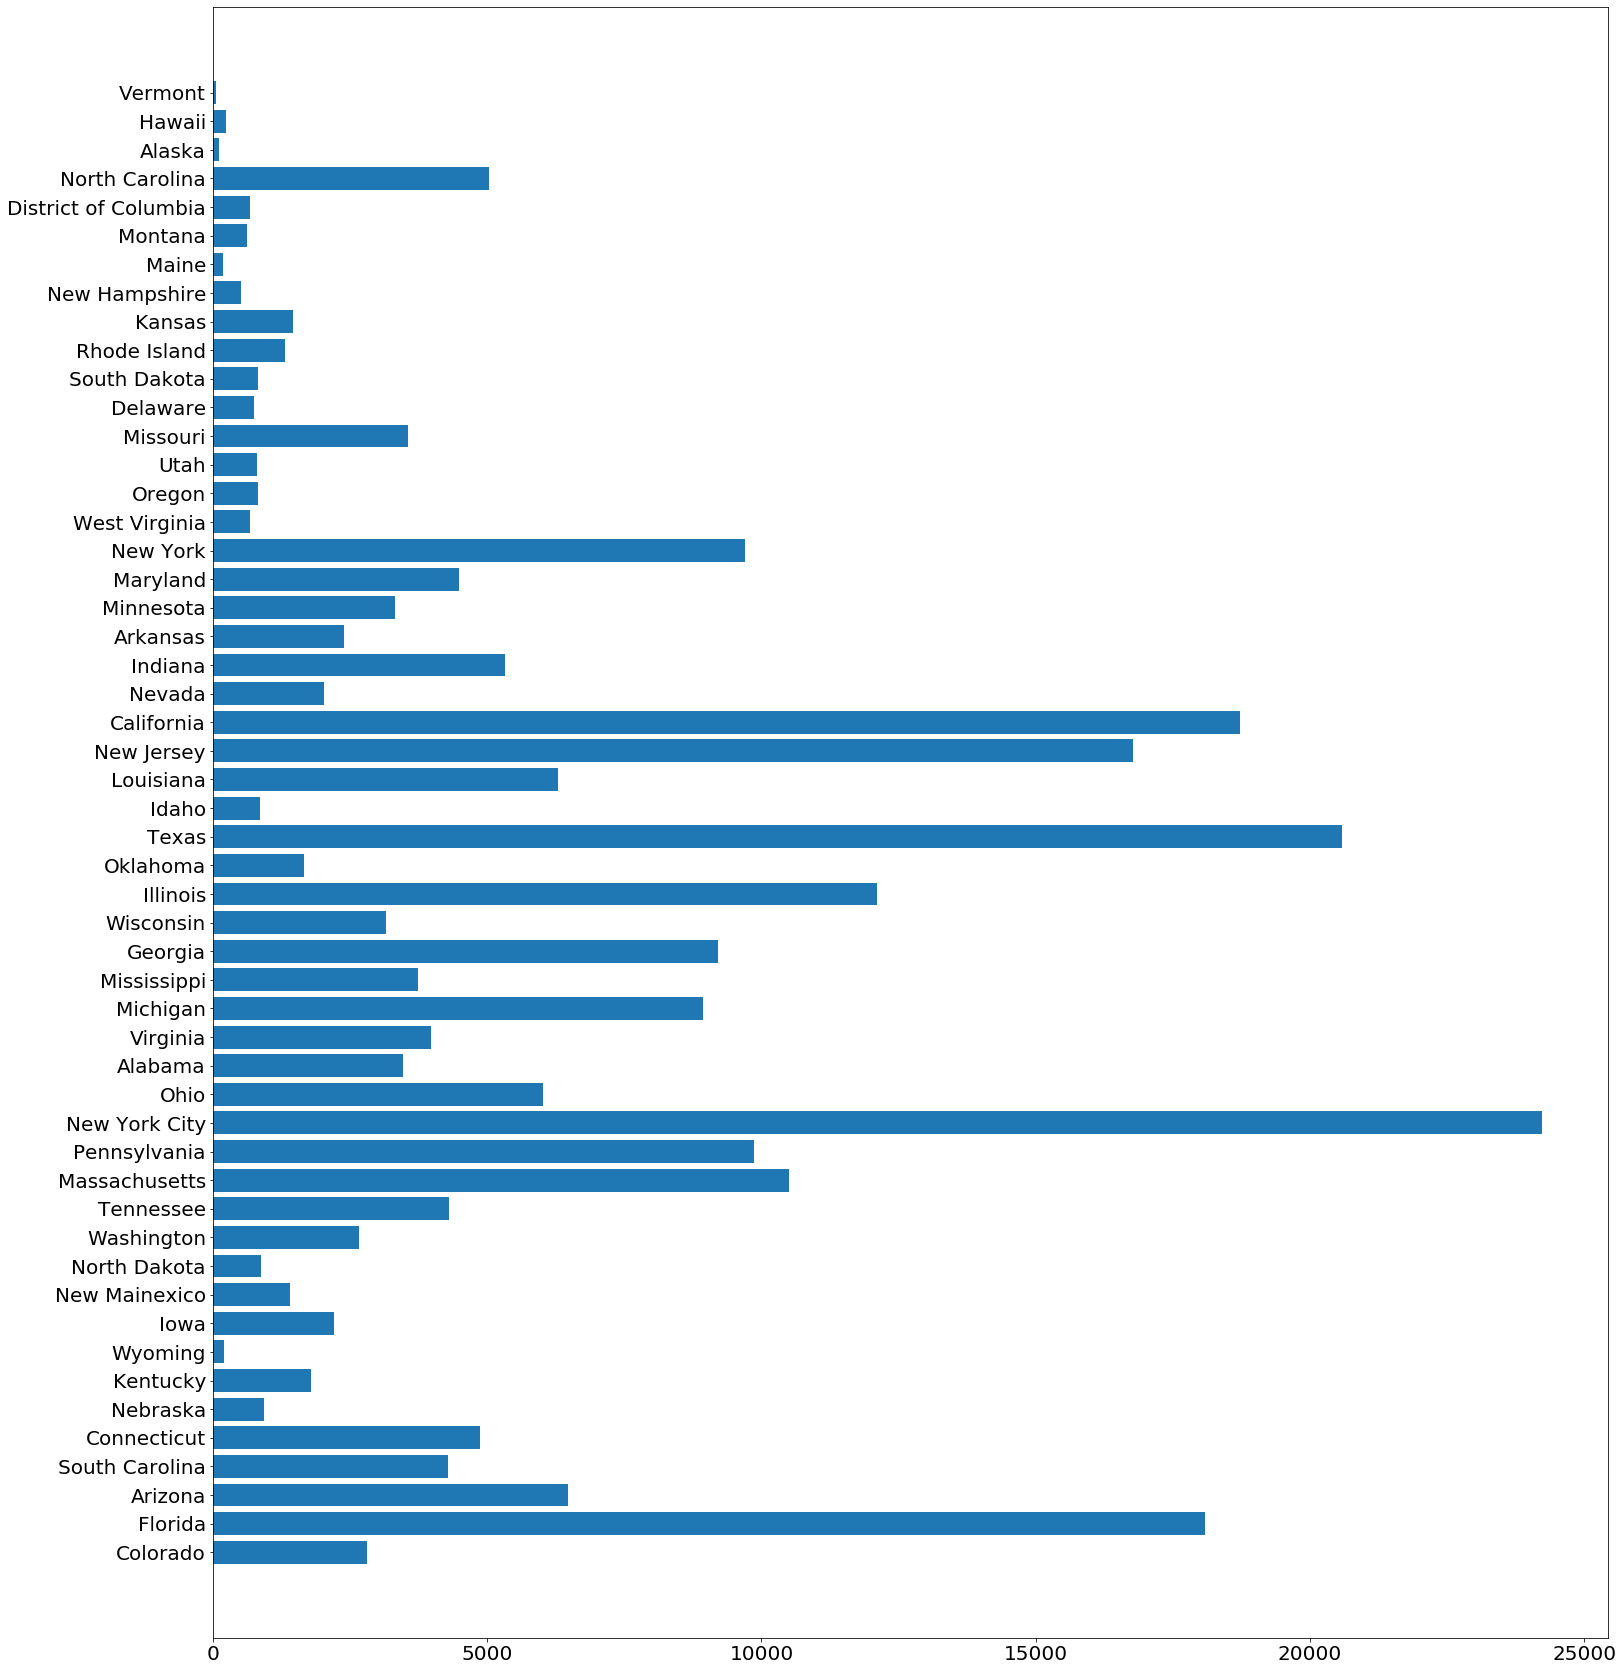

In [10]:
fig = plt.figure(figsize=(25,30))  
#plt.tick_params(axis='x',labelsize=10) 
fontsize = 20
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.barh(dfdate1123['state'], dfdate1123['tot_death'])

#### Why has New York City suffered seriously?
The following question is: 
4. Why does New York City suffer seriously?

There might be some correlation between the Covid-19 total cases and the deaths in New York City. The histogram could be easy to show the correlation.

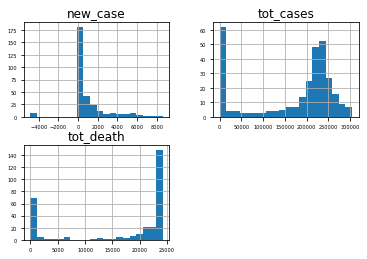

In [13]:
dfnyc = df[df['state']=="New York City"]
dfnyc[['new_case', 'tot_cases', 'tot_death']].hist(bins = 20)
fontsize = 3
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.show()

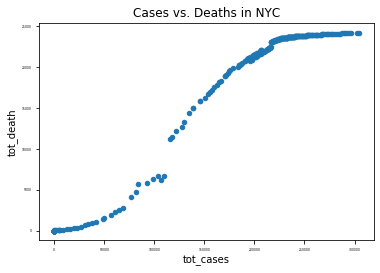

In [14]:
dfnyc.plot(kind = 'scatter', x = 'tot_cases', y = 'tot_death', title = 'Cases vs. Deaths in NYC')
plt.show()

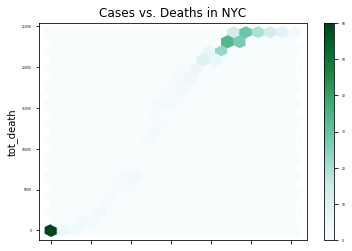

In [15]:
dfnyc.plot(kind = 'hexbin', x = 'tot_cases', y = 'tot_death', title = 'Cases vs. Deaths in NYC', gridsize = 20)
plt.show()

It shows that there is some correlation between the numbers of the total cases and the total death, but it's not very relevant as the the scatter and hexbin charts display.

In order to explore the detailed information of the pandemic it's needed to use another dataset to figure out the causes behind:

In the CDC's website, it's easy to find these the related dataset: Provisional Death Counts for Coronavirus Disease (COVID-19): Distribution of Deaths by Race and Hispanic Origin, which shows the correlation between the death and the race.

(Dataset Two: https://data.cdc.gov/NCHS/Provisional-Death-Counts-for-Coronavirus-Disease-C/pj7m-y5uh )

After the data cleaning, the second dataset has been made which only

In [16]:
df2 = pd.read_csv('../Provisional_Death_Counts_for_Coronavirus_Disease_NYC.csv')
df2.head(5)

,Race and ethnicity,Count of COVID-19 deaths,Distribution of COVID-19 deaths (%)
0,Non-Hispanic White,5563.0,26.4
1,Non-Hispanic Black or African American,6077.0,28.8
2,Non-Hispanic American Indian or Alaska Native,NaN,NaN
3,Non-Hispanic Asian,2068.0,9.8
4,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN,NaN


In [17]:
df2.columns

Index(['Race and ethnicity', 'Count of COVID-19 deaths',
       'Distribution of COVID-19 deaths (%)'],
      dtype='object')

By using the bar chart, it reveals that the minorities in this international and multicultural city lack of enough medical resources compared with other races.

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

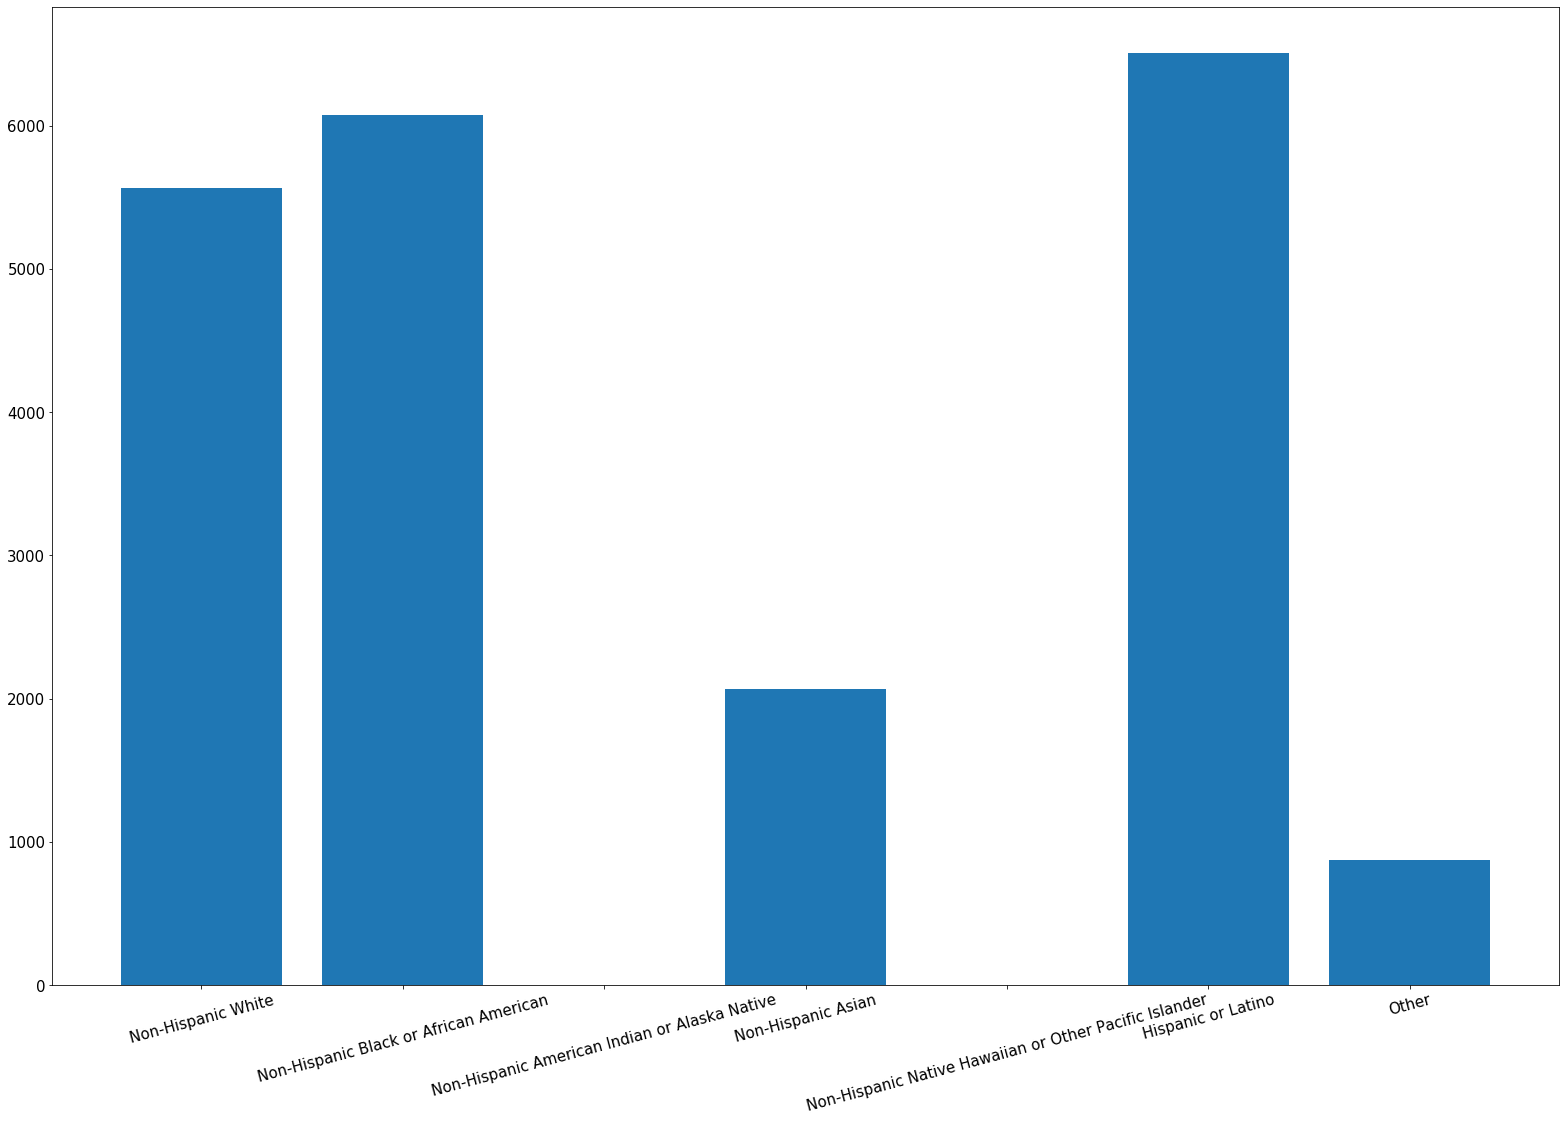

In [18]:
fig = plt.figure(figsize=(27,18))  
fontsize = 15
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
#plt.tick_params(axis='x',labelsize=12) 
plt.bar(df2['Race and ethnicity'], df2['Count of COVID-19 deaths'])
plt.xticks(rotation=15) 

The spreading of the Covid-19 virus in New York City continues as the unsteady line showing in the line plot “New Cases Trend in NYC”. 

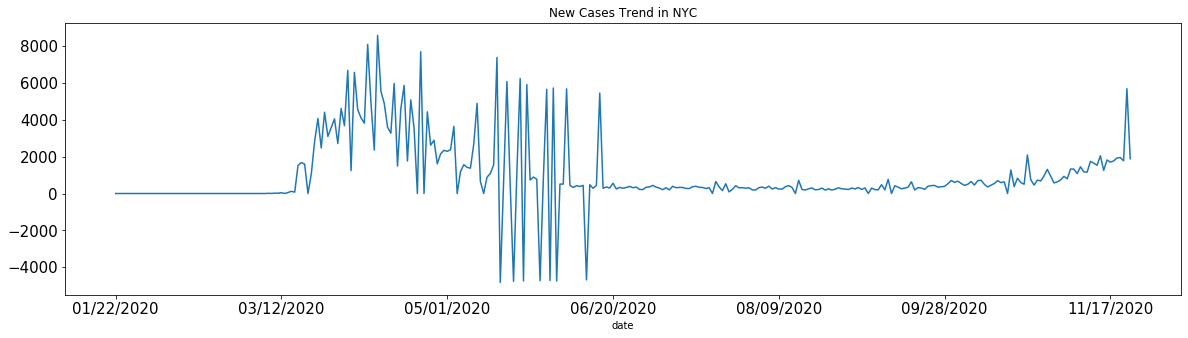

In [19]:
dfnyc[['date', 'new_case']].plot(kind = 'line', x = 'date', y = 'new_case', title = 'New Cases Trend in NYC', figsize=(20,5), legend = False)
plt.show()

However, for the perspective of the number of the new deaths, New York City has made some progress during the past several months.

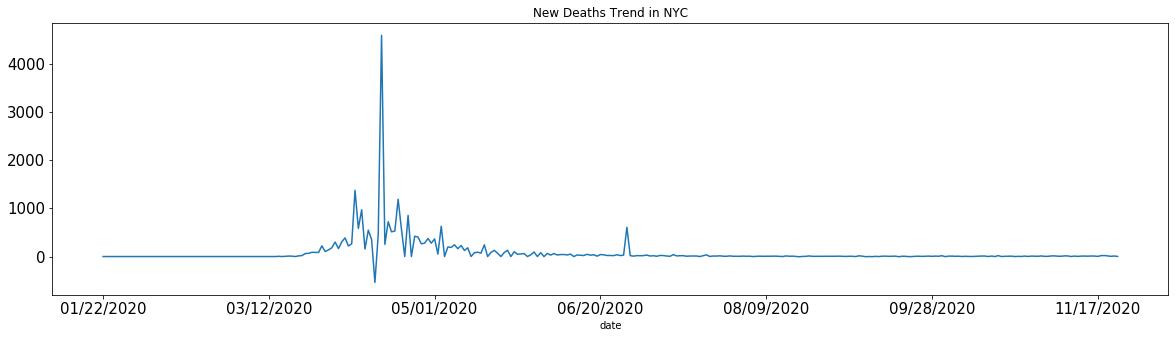

In [20]:
dfnyc = df[df['state']=="New York City"]
dfnyc[['date', 'new_death']].plot(kind = 'line', x = 'date', y = 'new_death', title = 'New Deaths Trend in NYC', figsize=(20,5), legend = False)
plt.show()

### Is it still far away to reach the end of the pandemic in America?

As the winter is coming, what's going on in the US? And the following question is:

5.	Is it still far away to reach the end of the pandemic in America?

The numbers of the new deaths around all the states which are included in the first dataset could show the trend. The subplot graph is a good way to show the overall development of the pandemic in the US. 

In [21]:
states = df.groupby('state').size()
print(states.index)
print('num of states:',len(states)) 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mainexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')
num of states: 52


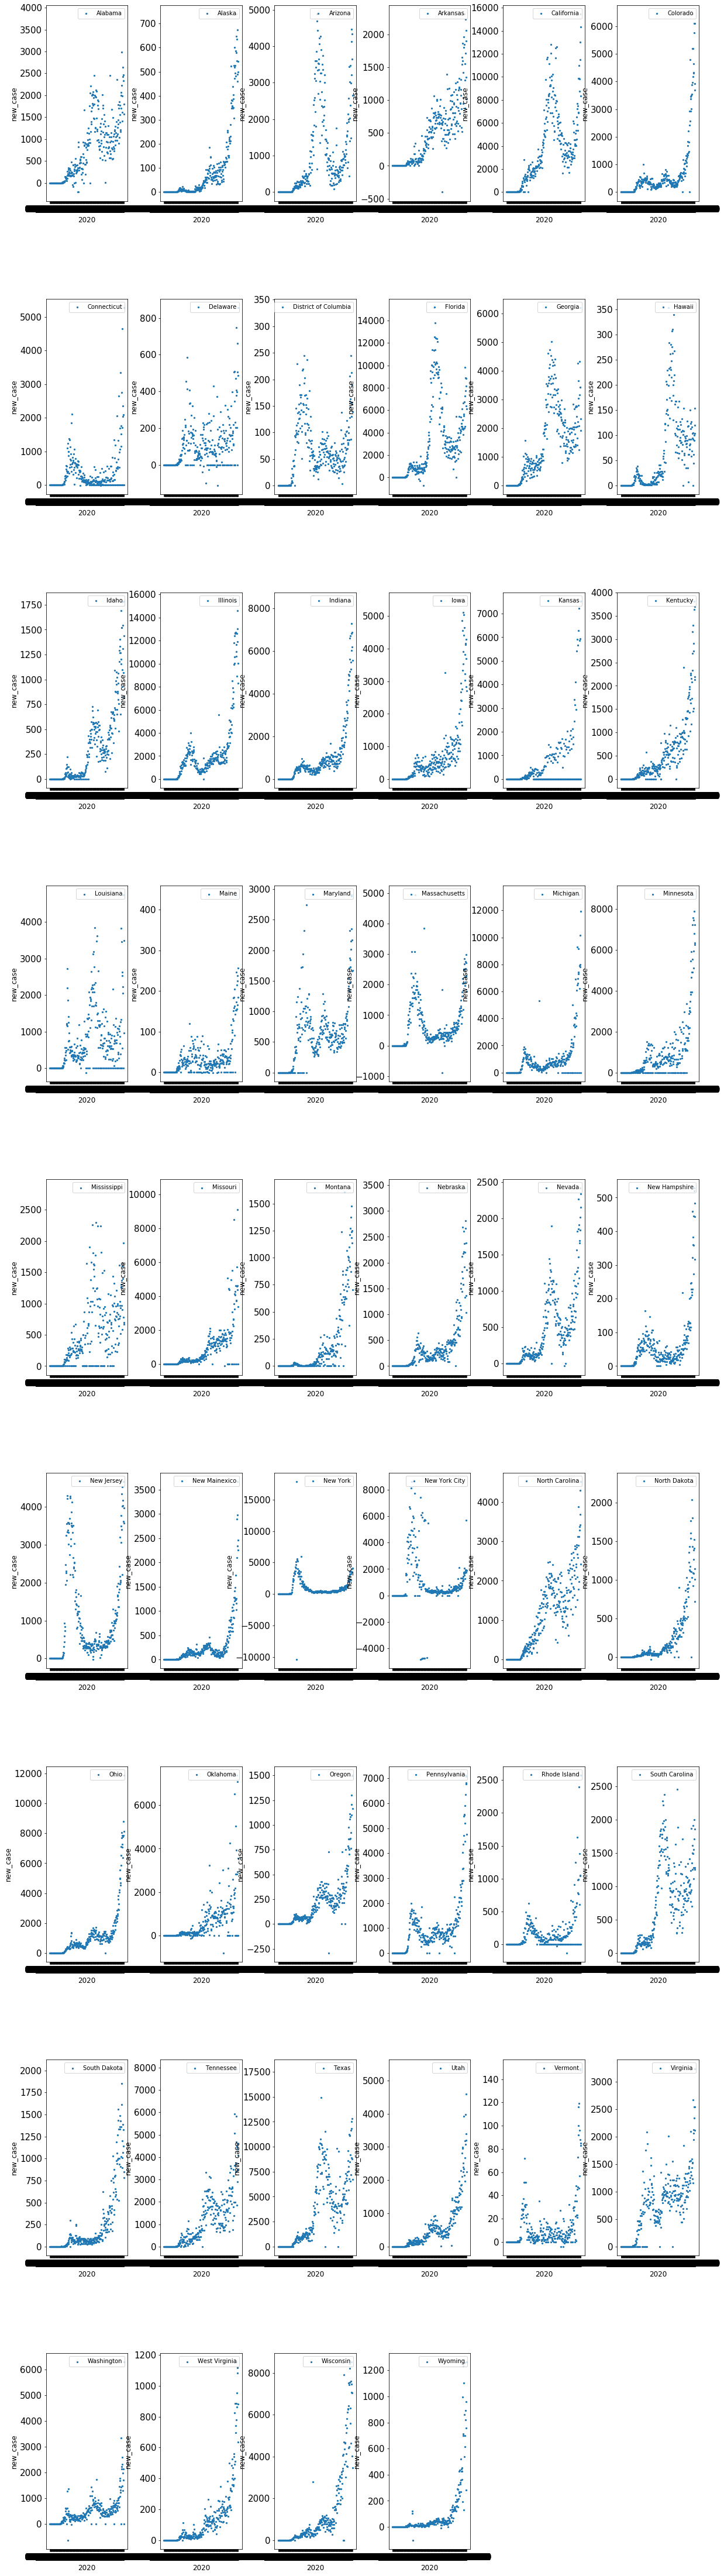

In [22]:
fig = plt.figure(figsize=(20,80)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1
for state in states.index:
    ax = fig.add_subplot(9,6,n) 
    x = df[df['state'] == state]['date']
    y = df[df['state'] == state]['new_case']
    ax.scatter(x,y,s=5)
    ax.set_xlabel('2020',fontsize=12)
    ax.set_ylabel('new_case',fontsize=12)
    ax.legend([state],loc = 'upper right') 
    n = n+1

plt.show()

With the help of the line chart, it could be easy to show the new situation of the five epicenters. 

One of typical features tells that the number of the cases in Texas are rising rapidly and are surpassing the one in California.

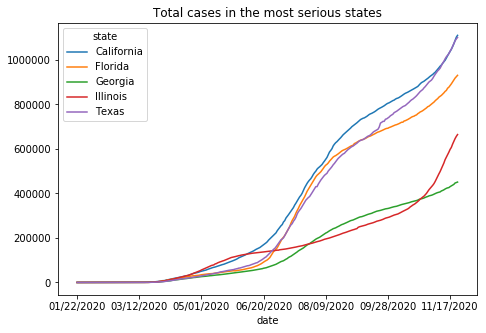

In [23]:
df_5state = df.loc[df['state'].isin(['California', 'Texas', 'Florida', 'Illinois', 'Georgia'])]
df_5state_pivot = df_5state.pivot_table(values = 'tot_cases', columns = 'state', index = 'date')
df_5state_pivot.plot(title = 'Total cases in the most serious states', figsize=(7.5,5))

plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10) 
plt.show()

The following consideration is: 

How to display the lost of the Americans in this pandemic? Maybe the difference of the numbers of the deaths during the past several year could be a good choice.

In order to discover the lost of the Americans this year, it's needed to use the third dataset from the CDC "Weekly counts of deaths by jurisdiction and race and Hispanic origin", which could be used to display the comparison of the weekly death numbers from 2015 to this year. 

(Dataset Three: https://data.cdc.gov/NCHS/Weekly-counts-of-deaths-by-jurisdiction-and-race-a/qfhf-uhaa)

By using the line chart, it's easy to tell the differences. And in order to display the difference more obviously, it's helpful to fill the area between two lines with color.

In [24]:
df3 = pd.read_csv('../Weekly_counts_of_deaths_by_jurisdiction_and_race_and_Hispanic_origin.csv')
df3.head()

,Jurisdiction,Week Ending Date,State Abbreviation,MMWRYear,MMWRWeek,Race/Ethnicity,Time Period,Suppress,Note,Outcome,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,01/10/2015,AL,2015,1,Hispanic,2015-2019,NaN,NaN,All Cause,10.0,8.0,NaN,NaN,Predicted (weighted)
1,Alabama,01/09/2016,AL,2016,1,Hispanic,2015-2019,NaN,NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)
2,Alabama,01/07/2017,AL,2017,1,Hispanic,2015-2019,NaN,NaN,All Cause,12.0,8.0,NaN,NaN,Predicted (weighted)
3,Alabama,01/06/2018,AL,2018,1,Hispanic,2015-2019,NaN,NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)
4,Alabama,01/05/2019,AL,2019,1,Hispanic,2015-2019,NaN,NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)


In [25]:
df3.tail(50)

,Jurisdiction,Week Ending Date,State Abbreviation,MMWRYear,MMWRWeek,Race/Ethnicity,Time Period,Suppress,Note,Outcome,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
594778,Wyoming,10/26/2019,WY,2019,43,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594779,Wyoming,10/24/2020,WY,2020,43,Other,2020,NaN,Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594780,Wyoming,11/07/2015,WY,2015,44,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594781,Wyoming,11/05/2016,WY,2016,44,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594782,Wyoming,11/04/2017,WY,2017,44,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594783,Wyoming,11/03/2018,WY,2018,44,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594784,Wyoming,11/02/2019,WY,2019,44,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594785,Wyoming,10/31/2020,WY,2020,44,Other,2020,NaN,Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594786,Wyoming,11/14/2015,WY,2015,45,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted
594787,Wyoming,11/12/2016,WY,2016,45,Other,2015-2019,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,Unweighted


In [26]:
data3 = df3.groupby(['MMWRYear', 'MMWRWeek', 'Outcome'], as_index=False)['Number of Deaths'].sum()

In [27]:
table = pd.pivot_table(data3, values='Number of Deaths', index=['MMWRYear', 'MMWRWeek'], columns='Outcome', aggfunc='sum')
table['Year'] = table.droplevel(level=1).index
table['Week'] = table.droplevel(level=0).index
table['Year'] = table['Year'].astype('category')
table.head()

Outcome            All Cause  All Cause excluding COVID-19  COVID-19  Year  \
MMWRYear MMWRWeek                                                            
2015     1          248058.0                      248058.0       0.0  2015   
         2          245622.0                      245622.0       0.0  2015   
         3          235400.0                      235400.0       0.0  2015   
         4          229868.0                      229868.0       0.0  2015   
         5          230062.0                      230062.0       0.0  2015   

Outcome            Week  
MMWRYear MMWRWeek        
2015     1            1  
         2            2  
         3            3  
         4            4  
         5            5

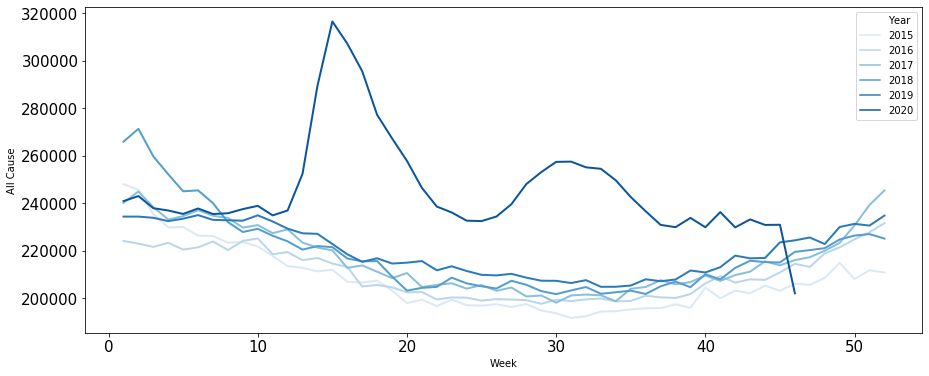

In [28]:
fontsize = 12
plt.rcParams['xtick.labelsize'] 
plt.rcParams['ytick.labelsize'] 
plt.rcParams['axes.labelsize'] 
plt.rcParams['axes.titlesize'] 
plt.rcParams['legend.fontsize'] 
plt.rcParams['legend.title_fontsize'] 

plt.rcParams['figure.figsize'] = (15, 6)

sns.lineplot(x='Week', y='All Cause', hue='Year',
             palette='Blues', lw=2,
             data=table)

Text(0.5, 1.0, 'Dead Population by All Cause Per Week of the US')

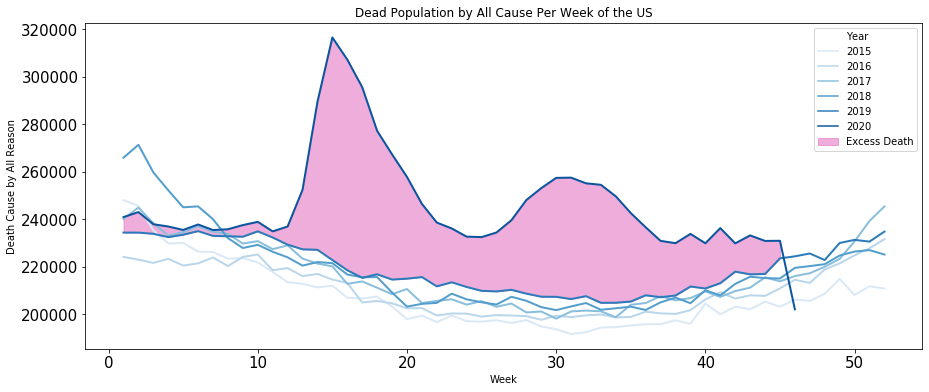

In [29]:
fontsize = 12
plt.rcParams['xtick.labelsize'] 
plt.rcParams['ytick.labelsize'] 
plt.rcParams['axes.labelsize'] 
plt.rcParams['axes.titlesize'] 
plt.rcParams['legend.fontsize'] 
plt.rcParams['legend.title_fontsize'] 

plt.rcParams['figure.figsize'] = (15, 6)

sns.lineplot(x='Week', y='All Cause', hue='Year',
             palette='Blues', lw=2,
             data=table)

week_num = 45
where = np.array(table.loc[table['Year'] == 2020, 'All Cause'][:week_num]) > np.array(
    table.loc[table['Year'] == 2019, 'All Cause'][:week_num])
plt.fill_between(table.loc[table['Year'] == 2020, 'Week'][:week_num],
                 table.loc[table['Year'] == 2020, 'All Cause'][:week_num],
                 table.loc[table['Year'] == 2019, 'All Cause'][:week_num],
                 where=where,
                 color='tab:pink',
                 alpha=0.6,
                 label='Excess Death'
                 )

plt.legend(loc=1)
plt.ylabel('Death Cause by All Reason')
plt.title('Dead Population by All Cause Per Week of the US')